# Task 1



## Objectives

For dataset **Fashion MNIST**:

1. Split training set into training and validation set (90-10)
2. Experiment with:
    - [x] Weight Initializations
    - [x] Activation Functions
    - [x] Try different optimizers
    - [ ] Regularizations
      - [ ] **L1**
      - [ ] **L2**
      - [ ] **Dropout**
      - [ ] **No Dropout**
    - [ ] Optimizing Hyperparameters (Keep the 3 best)
   
3. Additionally experiment with,
    - [ ] Adding/Removing layers to the network
    - [ ] Number of filters
    - [ ] Size of filters

Train **CIFAR-10** to get a base-level performance.
With the 3 best hyperparameters, train **CIFAR-10**.
Check if performance gains translate to this dataset.

## Notes

Until the present moment the best Optimizer is SGD with Nesterov Momentum.
Best weight initializer is default

## Implementation

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Pre-processing dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
# Rescale pixel values to [0,1]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [4]:
# Define the class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

### MLP: Base level

#### Creating the model

In [5]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

Metal device set to: Apple M1 Pro


2023-10-09 16:06:44.375988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-09 16:06:44.376087: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Compiling the model

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

#### Training the model

In [7]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:06:45.026691: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-09 16:06:45.225523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7221 - accuracy: 0.7647

2023-10-09 16:06:57.012026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 14s 7ms/step - loss: 0.7221 - accuracy: 0.7647 - val_loss: 0.4958 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4826 - accuracy: 0.8330 - val_loss: 0.4573 - val_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4368 - accuracy: 0.8479 - val_loss: 0.4237 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4120 - accuracy: 0.8559 - val_loss: 0.3967 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3910 - accuracy: 0.8631 - val_loss: 0.3882 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3750 - accuracy: 0.8687 - val_loss: 0.3907 - val_accuracy: 0.8602
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3629 - accuracy: 0.8710 - val_loss: 0.3707 - val_accuracy: 0.8702
Ep

#### Evaluating the model

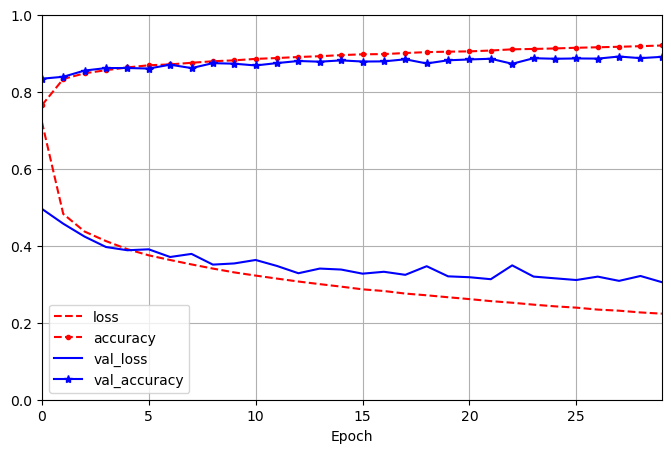

In [8]:
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3251 - accuracy: 0.8849


[0.3251110315322876, 0.8848999738693237]

### MLP: Different Initilizers


#### Normal Distribution Weight Initializer

Initializer that generates tensors with a normal distribution.

In [10]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="random_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="random_normal"),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="random_normal")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [11]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:11:51.161094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.9400 - accuracy: 0.6890

2023-10-09 16:12:02.317587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 13s 7ms/step - loss: 0.9400 - accuracy: 0.6890 - val_loss: 0.5851 - val_accuracy: 0.8000
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5496 - accuracy: 0.8084 - val_loss: 0.5033 - val_accuracy: 0.8238
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4837 - accuracy: 0.8300 - val_loss: 0.4551 - val_accuracy: 0.8414
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4513 - accuracy: 0.8407 - val_loss: 0.4260 - val_accuracy: 0.8496
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4269 - accuracy: 0.8493 - val_loss: 0.4133 - val_accuracy: 0.8516
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4078 - accuracy: 0.8558 - val_loss: 0.4132 - val_accuracy: 0.8542
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3937 - accuracy: 0.8608 - val_loss: 0.3893 - val_accuracy: 0.8

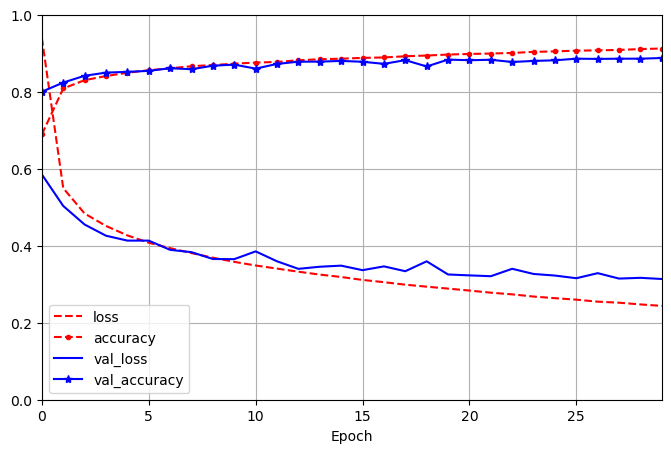

313/313 [==============================] - 2s 6ms/step - loss: 0.3310 - accuracy: 0.8796


[0.3310123682022095, 0.8795999884605408]

In [12]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### Uniform Distribution Weight Initializer

Initializer that generates tensors with a uniform distribution.

In [13]:
# Uniform Distribution Initiliazer [-0.5,0.5]
initializer = tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=42)

# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer=initializer),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer=initializer)
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [14]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:17:05.343254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.0188 - accuracy: 0.7445

2023-10-09 16:17:17.267744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 14s 7ms/step - loss: 1.0188 - accuracy: 0.7445 - val_loss: 0.6005 - val_accuracy: 0.7876
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5484 - accuracy: 0.8067 - val_loss: 0.5386 - val_accuracy: 0.8072
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4968 - accuracy: 0.8228 - val_loss: 0.5012 - val_accuracy: 0.8192
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4704 - accuracy: 0.8319 - val_loss: 0.4847 - val_accuracy: 0.8236
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4484 - accuracy: 0.8382 - val_loss: 0.4746 - val_accuracy: 0.8222
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4317 - accuracy: 0.8436 - val_loss: 0.4779 - val_accuracy: 0.8286
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4189 - accuracy: 0.8481 - val_loss: 0.4495 - val_accuracy: 0.8

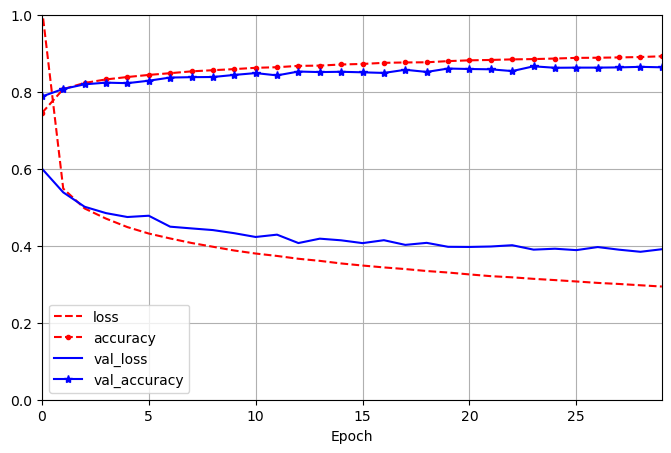

313/313 [==============================] - 2s 7ms/step - loss: 0.4166 - accuracy: 0.8554


[0.41664403676986694, 0.855400025844574]

In [15]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

### MLP: Different Activations


#### Sigmoid Activation

In [16]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [17]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:22:22.589829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.9469 - accuracy: 0.4796

2023-10-09 16:22:33.463134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 13s 7ms/step - loss: 1.9469 - accuracy: 0.4796 - val_loss: 1.4909 - val_accuracy: 0.5984
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 1.2236 - accuracy: 0.6415 - val_loss: 1.0291 - val_accuracy: 0.6792
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.9409 - accuracy: 0.6973 - val_loss: 0.8430 - val_accuracy: 0.7220
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8045 - accuracy: 0.7257 - val_loss: 0.7401 - val_accuracy: 0.7424
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7219 - accuracy: 0.7428 - val_loss: 0.6779 - val_accuracy: 0.7502
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6693 - accuracy: 0.7557 - val_loss: 0.6374 - val_accuracy: 0.7578
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6332 - accuracy: 0.7671 - val_loss: 0.6072 - val_accuracy: 0.7

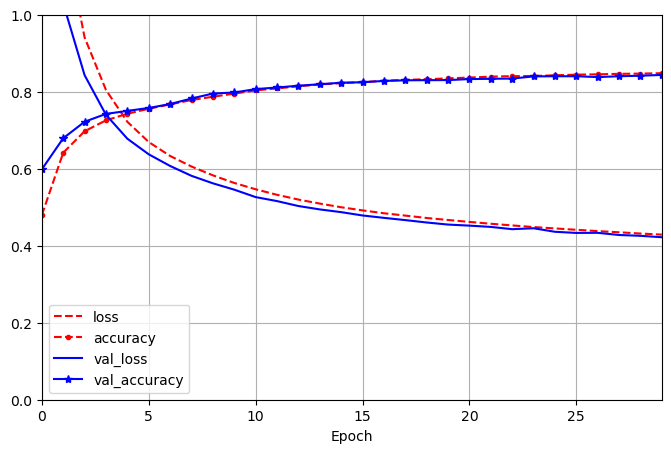

313/313 [==============================] - 2s 6ms/step - loss: 0.4594 - accuracy: 0.8345


[0.45939385890960693, 0.8345000147819519]

In [18]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### TanH Activation

In [19]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="tanh"),
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [20]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:28:09.839480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x10xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x10xi1>'


1714/1719 [============================>.] - ETA: 0s - loss: 4.1550 - accuracy: 0.1197

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x24x1x10xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x24x1x10xi1>'


1719/1719 [==============================] - ETA: 0s - loss: 4.1484 - accuracy: 0.1196

2023-10-09 16:28:25.741712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 18s 9ms/step - loss: 4.1484 - accuracy: 0.1196 - val_loss: 1.8271 - val_accuracy: 0.1008
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 1.8463 - accuracy: 0.1619 - val_loss: 1.7652 - val_accuracy: 0.1592
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 3.4376 - accuracy: 0.1188 - val_loss: 3.5117 - val_accuracy: 0.1650
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 3.7213 - accuracy: 0.1445 - val_loss: 3.5398 - val_accuracy: 0.1666
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 3.7118 - accuracy: 0.1479 - val_loss: 3.5380 - val_accuracy: 0.0662
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 3.6865 - accuracy: 0.0862 - val_loss: 3.4658 - val_accuracy: 0.0590
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 3.6957 - accuracy: 0.1061 - val_loss: 3.6478 - val_accuracy: 0.1

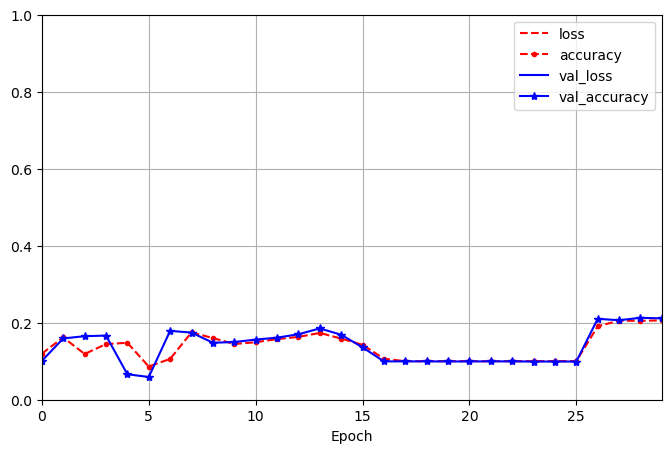

313/313 [==============================] - 2s 6ms/step - loss: 3.8090 - accuracy: 0.2049


[3.809035062789917, 0.20489999651908875]

In [21]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### Exponential Activation

In [22]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="exponential"),
    tf.keras.layers.Dense(100, activation="exponential"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [23]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:34:19.701568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0997

2023-10-09 16:34:31.210103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 13s 7ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1042
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 8/30
1719/1719 [================

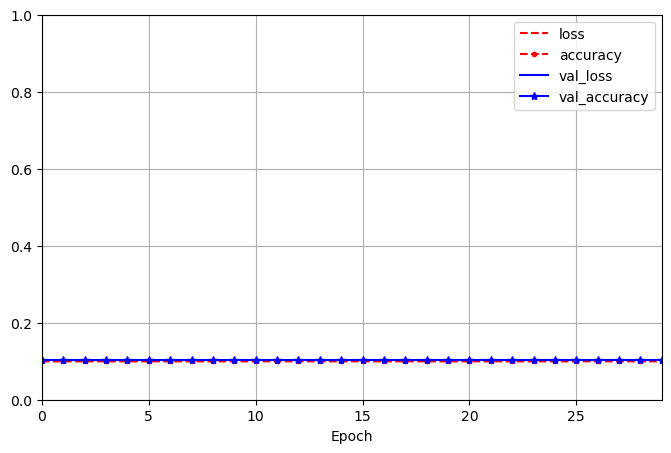

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [24]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

### MLP: Different Optimizers

In [25]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### SGD with Momentum

In [26]:
# Compiling the model
optimizer = tf.keras.optimizers.SGD(momentum=0.5)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [27]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:39:28.854936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.6263 - accuracy: 0.7867

2023-10-09 16:39:40.203015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 13s 7ms/step - loss: 0.6263 - accuracy: 0.7867 - val_loss: 0.4728 - val_accuracy: 0.8346
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4475 - accuracy: 0.8417 - val_loss: 0.4170 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4017 - accuracy: 0.8572 - val_loss: 0.3882 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3749 - accuracy: 0.8670 - val_loss: 0.3651 - val_accuracy: 0.8726
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3536 - accuracy: 0.8727 - val_loss: 0.3646 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3367 - accuracy: 0.8789 - val_loss: 0.3746 - val_accuracy: 0.8672
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3236 - accuracy: 0.8817 - val_loss: 0.3613 - val_accuracy: 0.8

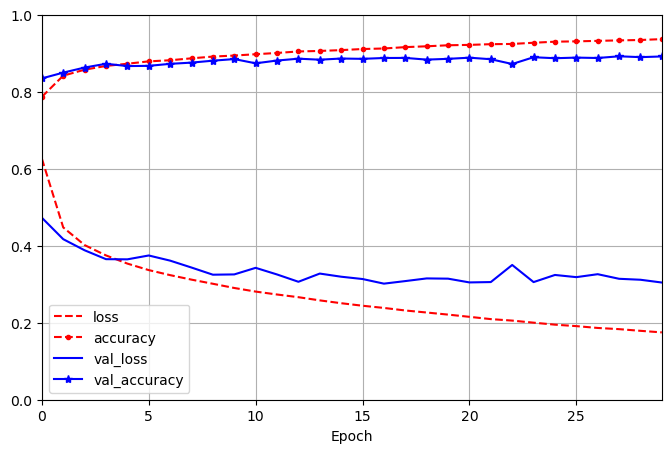

313/313 [==============================] - 2s 6ms/step - loss: 0.3285 - accuracy: 0.8881


[0.32850968837738037, 0.8881000280380249]

In [28]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### SGD with Nesterov Momentum

In [29]:
# Compiling the model
optimizer = tf.keras.optimizers.SGD(momentum=0.5, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [30]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:44:53.292275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.1700 - accuracy: 0.9380

2023-10-09 16:45:04.692173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 13s 7ms/step - loss: 0.1700 - accuracy: 0.9380 - val_loss: 0.3225 - val_accuracy: 0.8898
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1668 - accuracy: 0.9389 - val_loss: 0.3070 - val_accuracy: 0.8926
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1616 - accuracy: 0.9413 - val_loss: 0.3383 - val_accuracy: 0.8830
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1601 - accuracy: 0.9420 - val_loss: 0.3146 - val_accuracy: 0.8918
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1553 - accuracy: 0.9441 - val_loss: 0.3160 - val_accuracy: 0.8906
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1520 - accuracy: 0.9455 - val_loss: 0.3467 - val_accuracy: 0.8868
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1490 - accuracy: 0.9457 - val_loss: 0.3251 - val_accuracy: 0.8

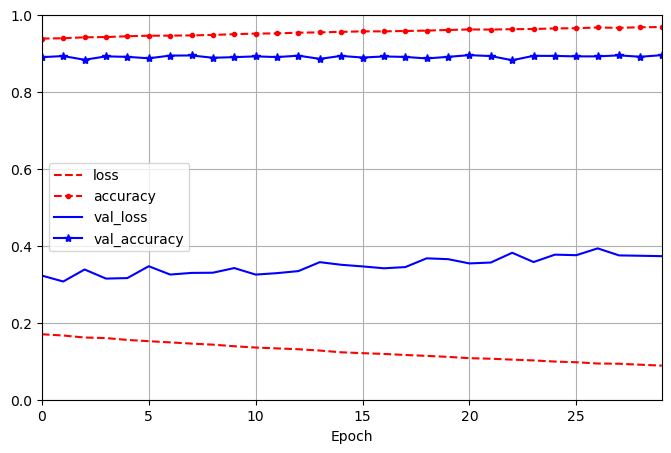

313/313 [==============================] - 2s 6ms/step - loss: 0.4058 - accuracy: 0.8865


[0.405793696641922, 0.8865000009536743]

In [31]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)

#### Adam

In [32]:
# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [33]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-09 16:50:20.812856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.4989 - accuracy: 0.8275

2023-10-09 16:50:33.929759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 15s 8ms/step - loss: 0.4989 - accuracy: 0.8275 - val_loss: 0.5012 - val_accuracy: 0.8002
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3928 - accuracy: 0.8558 - val_loss: 0.4214 - val_accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3674 - accuracy: 0.8653 - val_loss: 0.3686 - val_accuracy: 0.8708
Epoch 4/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3536 - accuracy: 0.8712 - val_loss: 0.3741 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3352 - accuracy: 0.8766 - val_loss: 0.3622 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3236 - accuracy: 0.8819 - val_loss: 0.3793 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3259 - accuracy: 0.8819 - val_loss: 0.3902 - val_accuracy: 0.8

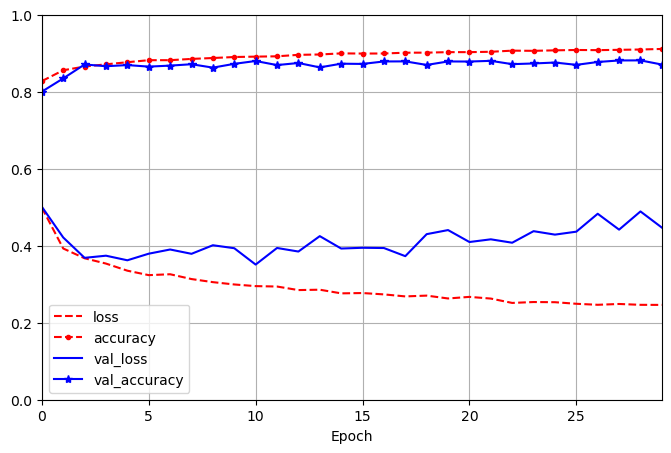

313/313 [==============================] - 2s 7ms/step - loss: 0.4691 - accuracy: 0.8658


[0.4691251516342163, 0.8658000230789185]

In [34]:
# Evaluate the model
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

model.evaluate(X_test, y_test)